In [39]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import mpu.pd
import sys


In [40]:
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap

In [41]:
reps = 1
size = 2

In [42]:
#take randomly 80% of the data for training and 20% for testing with the iris dataset
len = 0
#size of the dataset of iris csv
df = pd.read_csv('datasets/Iris_dataset.csv', delimiter=',')
tuples = [tuple(x) for x in df.values]
len = sum(1 for row in tuples)

#randomly shuffle the dataset
np.random.shuffle(tuples)
len = sum(1 for row in tuples)
print(len)

#take randomly 80% of the data for training and 20% for testing with the iris dataset
training_size = int(len*0.8)
testing_size = int(len*0.2)


#split the dataset into training and testing
train_features = tuples[:training_size]
size = sum(1 for row in train_features)
print("size of the training dataset: ", size)

# get the labels of the dataset
train_labels = []
for i in range(training_size):
    train_labels.append(train_features[i][4])
    train_features[i] = train_features[i][:4]
print("size of the training labels: ", sum(1 for row in train_labels))

test_features = tuples[training_size:]
print("size of the testing dataset: ", sum(1 for row in test_features))
test_labels = []
for i in range(testing_size):
    test_labels.append(test_features[i][4])
    test_features[i] = test_features[i][:4]

print("size of the testing labels: ", sum(1 for row in test_labels))


#convert to ndarray
train_features = np.array(train_features)
print("size of the training dataset: ", train_features.shape)

train_labels = np.array(train_labels)
print("size of the training labels: ", train_labels.shape)

test_features = np.array(test_features)
print("size of the testing dataset: ", test_features.shape)

test_labels = np.array(test_labels)
print("size of the testing labels: ", test_labels.shape)


150
size of the training dataset:  120
size of the training labels:  120
size of the testing dataset:  30
size of the testing labels:  30
size of the training dataset:  (120, 4)
size of the training labels:  (120,)
size of the testing dataset:  (30, 4)
size of the testing labels:  (30,)


In [44]:
optimizer = SPSA(maxiter=100)
feature_map = ZZFeatureMap(feature_dimension=4, reps=reps)
var_form = TwoLocal(4, ['ry', 'rz'], 'cz', reps=reps)
vqc = VQC(optimizer = optimizer, feature_map = feature_map, ansatz=var_form, loss="cross_entropy")

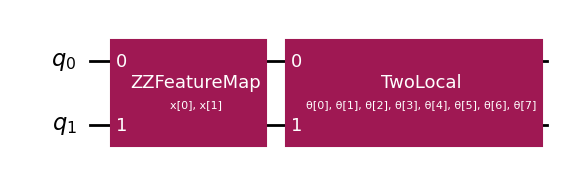

In [45]:
vqc.circuit.draw(output='mpl')

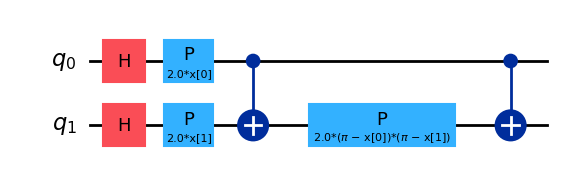

In [46]:
vqc.feature_map.decompose().draw(output='mpl')

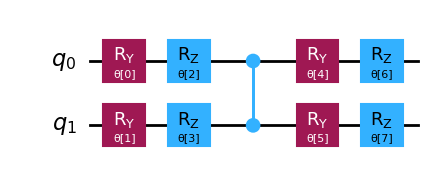

In [47]:
vqc.ansatz.decompose().draw(output='mpl')

In [48]:
vqc.fit(train_features, train_labels)

QiskitMachineLearningError: 'Input data has incorrect shape, last dimension is not equal to the number of inputs: 2, but got: 4.'

In [ ]:
vqc.score(train_features, train_labels)

In [ ]:
vqc.score(test_features, test_labels)

In [ ]:
predict = vqc.predict(test_features)
print(f"Predicted labels: {predict}")
print(f"Ground truth:     {test_labels}")